In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("ILearning.jl");
rng = MersenneTwister(1234);

In [2]:
N = 200;
P = 40;

In [3]:
n=50
NoiseValues = 0:1/(n-1):1
Nnoise = length(NoiseValues)

## Noise Vector
Success_0 = zeros(Int64,(1,length(NoiseValues)));

### Number of Simulations
Nsim = 300

### Number of maximum iterations for the HNN model
it_max =1000

1000

In [4]:
 BinaryStates,ComplexStates = ILearning.Multi_Estados()

([1, -1], Complex{Float64}[1.0 + 1.0im, 1.0 - 1.0im, -1.0 + 1.0im, -1.0 - 1.0im])

In [5]:
# First Order W matrix
Wc = zeros(N,N)
@showprogress for s = 1:Nsim

    U = 2*rand(rng,Bool,(N,P)).-1;

    W = ILearning.train(ILearning.first,U,nothing)


    for i = 1:Nnoise

        xr = ILearning.noise(U[:,1], BinaryStates,NoiseValues[i])
        
        y = ILearning.Asy(W,xr,it_max)
        
        Error = norm(U[:,1]-y)

        if Error<1.e-4
            Success_0[i] = Success_0[i] + 1
        end
        

    end
    
@save "JLDs/S140.jld2" NoiseValues Success_0 Nsim P
end

Progress: 100%|█████████████████████████████████████████| Time: 0:03:23


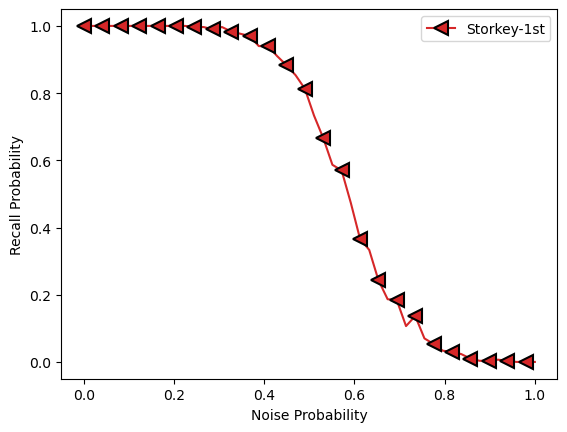

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [9]:
@load "JLDs/S140.jld2"
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
font0 = Dict(
        "font.size" => 18,
        "axes.labelweight" => "bold",
        "axes.labelsize" => 16,
        "xtick.labelsize" => 16,
        "ytick.labelsize" => 16,
        "legend.fontsize" => 12,
)
rule = "-1st"
plot(NoiseValues,Success_0[1,:]/Nsim,linewidth=1.5, color="#d62728",marker="<",markersize = 10,
             markeredgewidth=1.5, markeredgecolor=(0,0,0),markevery=(0,2),label="Storkey"*rule)

grid(linestyle="dotted")
xlabel("Noise Probability")
ylabel("Recall Probability")
legend()

### Loading String Name
name = "Binary Hopfield Neural Network"
legend()
grid()

savefig("Figures/S140.eps")
savefig("Figures/S140.eps")